In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
from scipy.stats import f_oneway
data_path = '../../data/Fig2'
land_path = '../../data/common_data/land_mask.tif'

lytools version 0.0.47


In [2]:
def plot_spatial(fpath,vmin=None,vmax=None):
    ## plot spatial figure
    array = ToRaster().raster2array(fpath)[0]
    # mask nan values
    array[array < -9999] = np.nan
    # above 30 degree
    array = array[:120]
    # plot the spatial figure
    plt.figure(figsize=(8, 4))
    plt.imshow(array, cmap='Spectral_r', vmin=vmin, vmax=vmax, aspect='auto')
    plt.colorbar()
    # plot the land mask
    DIC_and_TIF().plot_back_ground_arr_north_sphere(land_path, aspect='auto')
    # set xticks and yticks
    plt.xticks([])
    plt.yticks([])
    plt.title('Average of SR and MR recovery time (months)')
    plt.show()
    pass


In [3]:
def plot_fig2a():
    '''
    Plot drought recovery spatial figure
    average of MR and SR recovery time (months)
    :return:
    '''
    # load data
    fpath = join(data_path, 'average_of_SR_MR_recovery.tif')
    # plot the spatial figure
    plot_spatial(fpath,vmin=0,vmax=6)

    pass


In [4]:
def plot_fig2b():
    '''
    Plot drought recovery spatial figure
    SR recovery time (months)
    :return:
    '''
    # load data
    fpath = join(data_path, 'SR_recovery.tif')
    # plot the spatial figure
    plot_spatial(fpath,vmin=0,vmax=4)

    pass


In [5]:
def plot_fig2c():
    '''
    Plot drought recovery spatial figure
    MR recovery time (months)
    :return:
    '''
    # load data
    fpath = join(data_path, 'MR_recovery.tif')
    # plot the spatial figure
    plot_spatial(fpath, vmin=1, vmax=8)

    pass


In [6]:
def plot_fig2d_2e():
    dataframe_path = '../../data/Fig2/drought_recovery.df'
    df = Tools().load_df(dataframe_path)
    lc_list = Tools().get_df_unique_val_list(df, 'lc')
    lc_list = lc_list[::-1]
    print(lc_list)
    winter_mark = [0, 1]
    winter_mark_str_dict = {0: 'SR', 1: 'MR'}
    # winter_mark = [1]
    timing_list = ['early', 'mid', 'late', ]
    lim_list = [
        (1.3, 2.),
        (3, 7.)
    ]
    plt.figure(figsize=(12, 6))
    flag = 1
    for w in winter_mark:
        df_w = df[df['winter_mark'] == w]
        for t in timing_list:
            df_t = df_w[df_w['timing'] == t]
            if flag == 3:
                flag += 1
                continue
            plt.subplot(2, 3, flag)
            flag += 1
            sns.barplot(data=df_t, x='lc', y='recovery_time', ci=99.999999, order=lc_list)
            mean_list = []
            for lc in lc_list:
                df_lc = df_t[df_t['lc'] == lc]
                y_val = df_lc['recovery_time'].to_list()
                y_mean = np.nanmean(y_val)
                mean_list.append(y_mean)
            print(mean_list)
            std = np.std(mean_list)
            print('std', std)
            # sns.barplot(data=df_t,x='lc',y='recovery_time',ci='sd',order=Global_vars().lc_list())
            title = '{} {} Growing season'.format(winter_mark_str_dict[w], t)
            plt.title(title)
            plt.ylabel('Drought recovery(months)')
            plt.xlabel('Landcover')
            print(title)
            print('---')
            plt.ylim(lim_list[w])
            plt.tight_layout()

    plt.show()


In [7]:
def plot_fig2d_2e_ANOVA_test():
    ## F_oneway test
    dataframe_path = '../../data/Fig2/drought_recovery.df'
    df = Tools().load_df(dataframe_path)
    Tools().print_head_n(df, 5)
    lc_list = Tools().get_df_unique_val_list(df, 'lc')
    winter_mark_str_dict = {0: 'SR', 1: 'MR'}
    # Capitalize ABC
    print('\n')
    print('Capitalize ABC\n')
    for winter in [0,1]:
        for timing in ['early', 'mid', 'late']:
            tested_groups = []
            for lc in lc_list:
                df_winter = df[df['winter_mark'] == winter]
                df_timing = df_winter[df_winter['timing']==timing]
                df_lc = df_timing[df_timing['lc']==lc]
                Y = df_lc['recovery_time']
                Y = Y.dropna()
                Y = np.array(Y,dtype=int)
                tested_groups.append(Y)
            f12,p12 = f_oneway(tested_groups[0],tested_groups[1])
            f13,p13 = f_oneway(tested_groups[0],tested_groups[2])
            f23,p23 = f_oneway(tested_groups[1],tested_groups[2])
            print('{} {} Forest,Shrublands:{}'.format(winter_mark_str_dict[winter],timing,p12))
            print('{} {} Forest,Grasslands:{}'.format(winter_mark_str_dict[winter],timing,p13))
            print('{} {} Shrublands,Grasslands:{}'.format(winter_mark_str_dict[winter],timing,p23))
            print('#'*80)


    # lowercase abc
    print('\n')
    print('lowercase abc\n')
    for winter in [0,1]:
        for lc in lc_list:
            tested_groups = []
            for timing in ['early', 'mid', 'late']:
                df_winter = df[df['winter_mark'] == winter]
                df_timing = df_winter[df_winter['timing']==timing]
                df_lc = df_timing[df_timing['lc']==lc]
                Y = df_lc['recovery_time']
                Y = Y.dropna()
                Y = np.array(Y,dtype=int)
                tested_groups.append(Y)
            f12,p12 = f_oneway(tested_groups[0],tested_groups[1])
            f13,p13 = f_oneway(tested_groups[0],tested_groups[2])
            f23,p23 = f_oneway(tested_groups[1],tested_groups[2])
            print('{} {} early,mid:{}'.format(winter_mark_str_dict[winter],lc,p12))
            print('{} {} early,late:{}'.format(winter_mark_str_dict[winter],lc,p13))
            print('{} {} mid,late:{}'.format(winter_mark_str_dict[winter],lc,p23))
            print('#'*80)


    pass


In [8]:
def plot_fig2f():
    dataframe_path = '../../data/Fig2/drought_recovery.df'
    # dataframe_path = '/Volumes/Ugreen_4T_25/project05_redo/new_2021_results/arr/Dataframe/Dataframe.df'
    df = Tools().load_df(dataframe_path)
    df = df.dropna()
    lc_var = 'lc'
    timing_var = 'timing'
    winter_mark_var = 'winter_mark'
    df_cross = Tools().cross_select_dataframe(df, lc_var, timing_var)
    ratio_dict = {}
    for lc, timing in df_cross:
        df_i = df_cross[(lc, timing)]
        # print(df_i)
        df_with_winter = df_i[df_i[winter_mark_var] == 1]
        ratio = len(df_with_winter) / len(df_i)
        ratio_dict[(lc, timing)] = ratio
    lc_location_dict = {'Grasslands': 3, 'Shrublands': 2, 'deciduous': 1, 'evergreen': 0}
    timing_location_dict = {'early': 0, 'mid': 1, 'late': 2}
    lc_location_dict_reverse = {v: k for k, v in lc_location_dict.items()}
    timing_location_dict_reverse = {v: k for k, v in timing_location_dict.items()}
    array = np.ones((4, 3))
    for lc, timing in ratio_dict:
        lc_location = lc_location_dict[lc]
        timing_location = timing_location_dict[timing]
        array[lc_location, timing_location] = ratio_dict[(lc, timing)]
    # print(array)
    plt.imshow(array, cmap='Blues', interpolation='nearest',aspect='auto')
    plt.xticks(np.arange(3), [timing_location_dict_reverse[i] for i in range(3)])
    plt.yticks(np.arange(4), [lc_location_dict_reverse[i] for i in range(4)])
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    # print(ratio_dict)
    pass


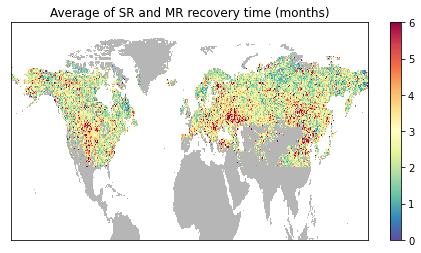

In [12]:
plot_fig2a()


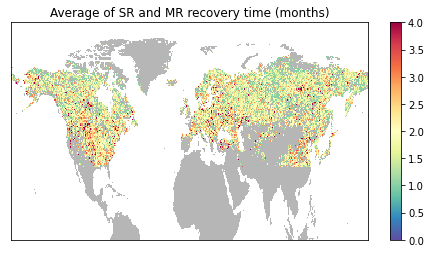

In [13]:
plot_fig2b()

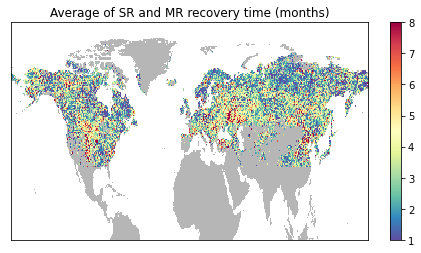

In [14]:
plot_fig2c()


('evergreen', 'deciduous', 'Shrublands', 'Grasslands')
[1.714392803598201, 1.7382899628252788, 1.698966408268734, 1.8097139055222888]
std 0.04243221804042385
SR early Growing season
---
[1.3570943652410048, 1.4789237668161435, 1.3556756756756756, 1.4320987654320987]
std 0.05225731838016094
SR mid Growing season
---
[5.43996901626646, 6.555151073898799, 5.207161125319693, 5.692532942898975]
std 0.5098033821661271
MR early Growing season
---
[4.858597285067873, 6.272217549761704, 4.341991341991342, 5.112444292080905]
std 0.7068454227605796
MR mid Growing season
---
[4.32296903942842, 5.1820479302832245, 3.077665219488664, 3.687461996838137]
std 0.7796927744895545
MR late Growing season
---


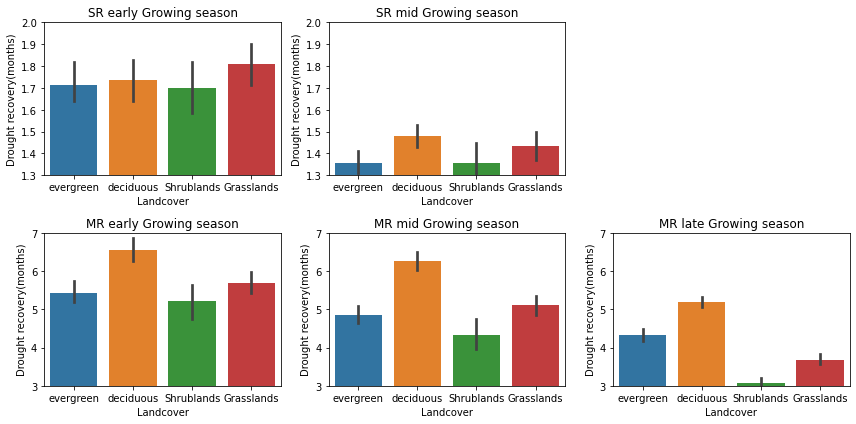

In [15]:
plot_fig2d_2e()


In [16]:
plot_fig2d_2e_ANOVA_test()


   winter_mark timing          lc  recovery_time
0            1  early        None              2
1            1   late        None              3
2            1   late        None              1
3            1   None        None              1
4            1  early  Grasslands              1


Capitalize ABC

SR early Forest,Shrublands:0.014971086930815596
SR early Forest,Grasslands:0.05896878352973833
SR early Shrublands,Grasslands:0.3647244402302664
################################################################################
SR mid Forest,Shrublands:0.005311263608408835
SR mid Forest,Grasslands:0.04561626343834419
SR mid Shrublands,Grasslands:5.256017394890991e-06
################################################################################
SR late Forest,Shrublands:6.369232294051355e-24
SR late Forest,Grasslands:3.0998719757902975e-27
SR late Shrublands,Grasslands:0.034434904094736984
################################################################################
MR early F

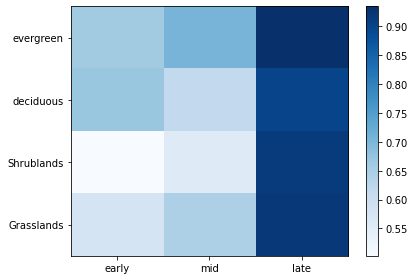

In [17]:
plot_fig2f()